In [37]:
from datetime import datetime

import pandas
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
%config InlineBackend.figure_format = "retina"

sns.set(rc={"figure.figsize" : (25, 15)})
sns.set(font_scale=2)
sns.set_style("ticks")

In [42]:
df = pandas.read_csv("troon_instagram_clean_post_data.csv")

In [43]:
df["post_month_num"] = df["post_month"].apply(lambda x : datetime.strptime(x, '%B').month)
df["year"] = df["post_year"].copy()
df["day"] = df["post_day"].copy()
df["month"] = df["post_month_num"].copy()
df["post_date"] = pandas.to_datetime(df[["year", "month", "day"]])
del df["year"]
del df["day"]
del df["month"]

In [44]:
df["Release Duration Group"] = df["release_duration_min"].apply(
    lambda x : np.nan if np.isnan(x) else
    ("Under 1 Minute" if x > 0 and x < 1 else
     ("1 - 59 Minutes" if x >= 1 and x < 60 else
      ("60 - 90 Minutes" if x >= 60 and x <= 90 else
       ("91 - 120 Minutes" if x >= 91 and x <= 120 else "More than 120 Minutes")))))

In [45]:
df.columns

Index(['id', 'URL', 'likes', 'post_weekday', 'post_month', 'post_day',
       'post_year', 'release_post', 'release_duration_min',
       'release_start_hour_24', 'release_end_hour_24',
       'days_since_previous_release', 'release_cans', 'release_pp',
       'beer_name', 'beer_abv', 'beer_description', 'post_month_num',
       'post_date', 'Release Duration Group'],
      dtype='object')

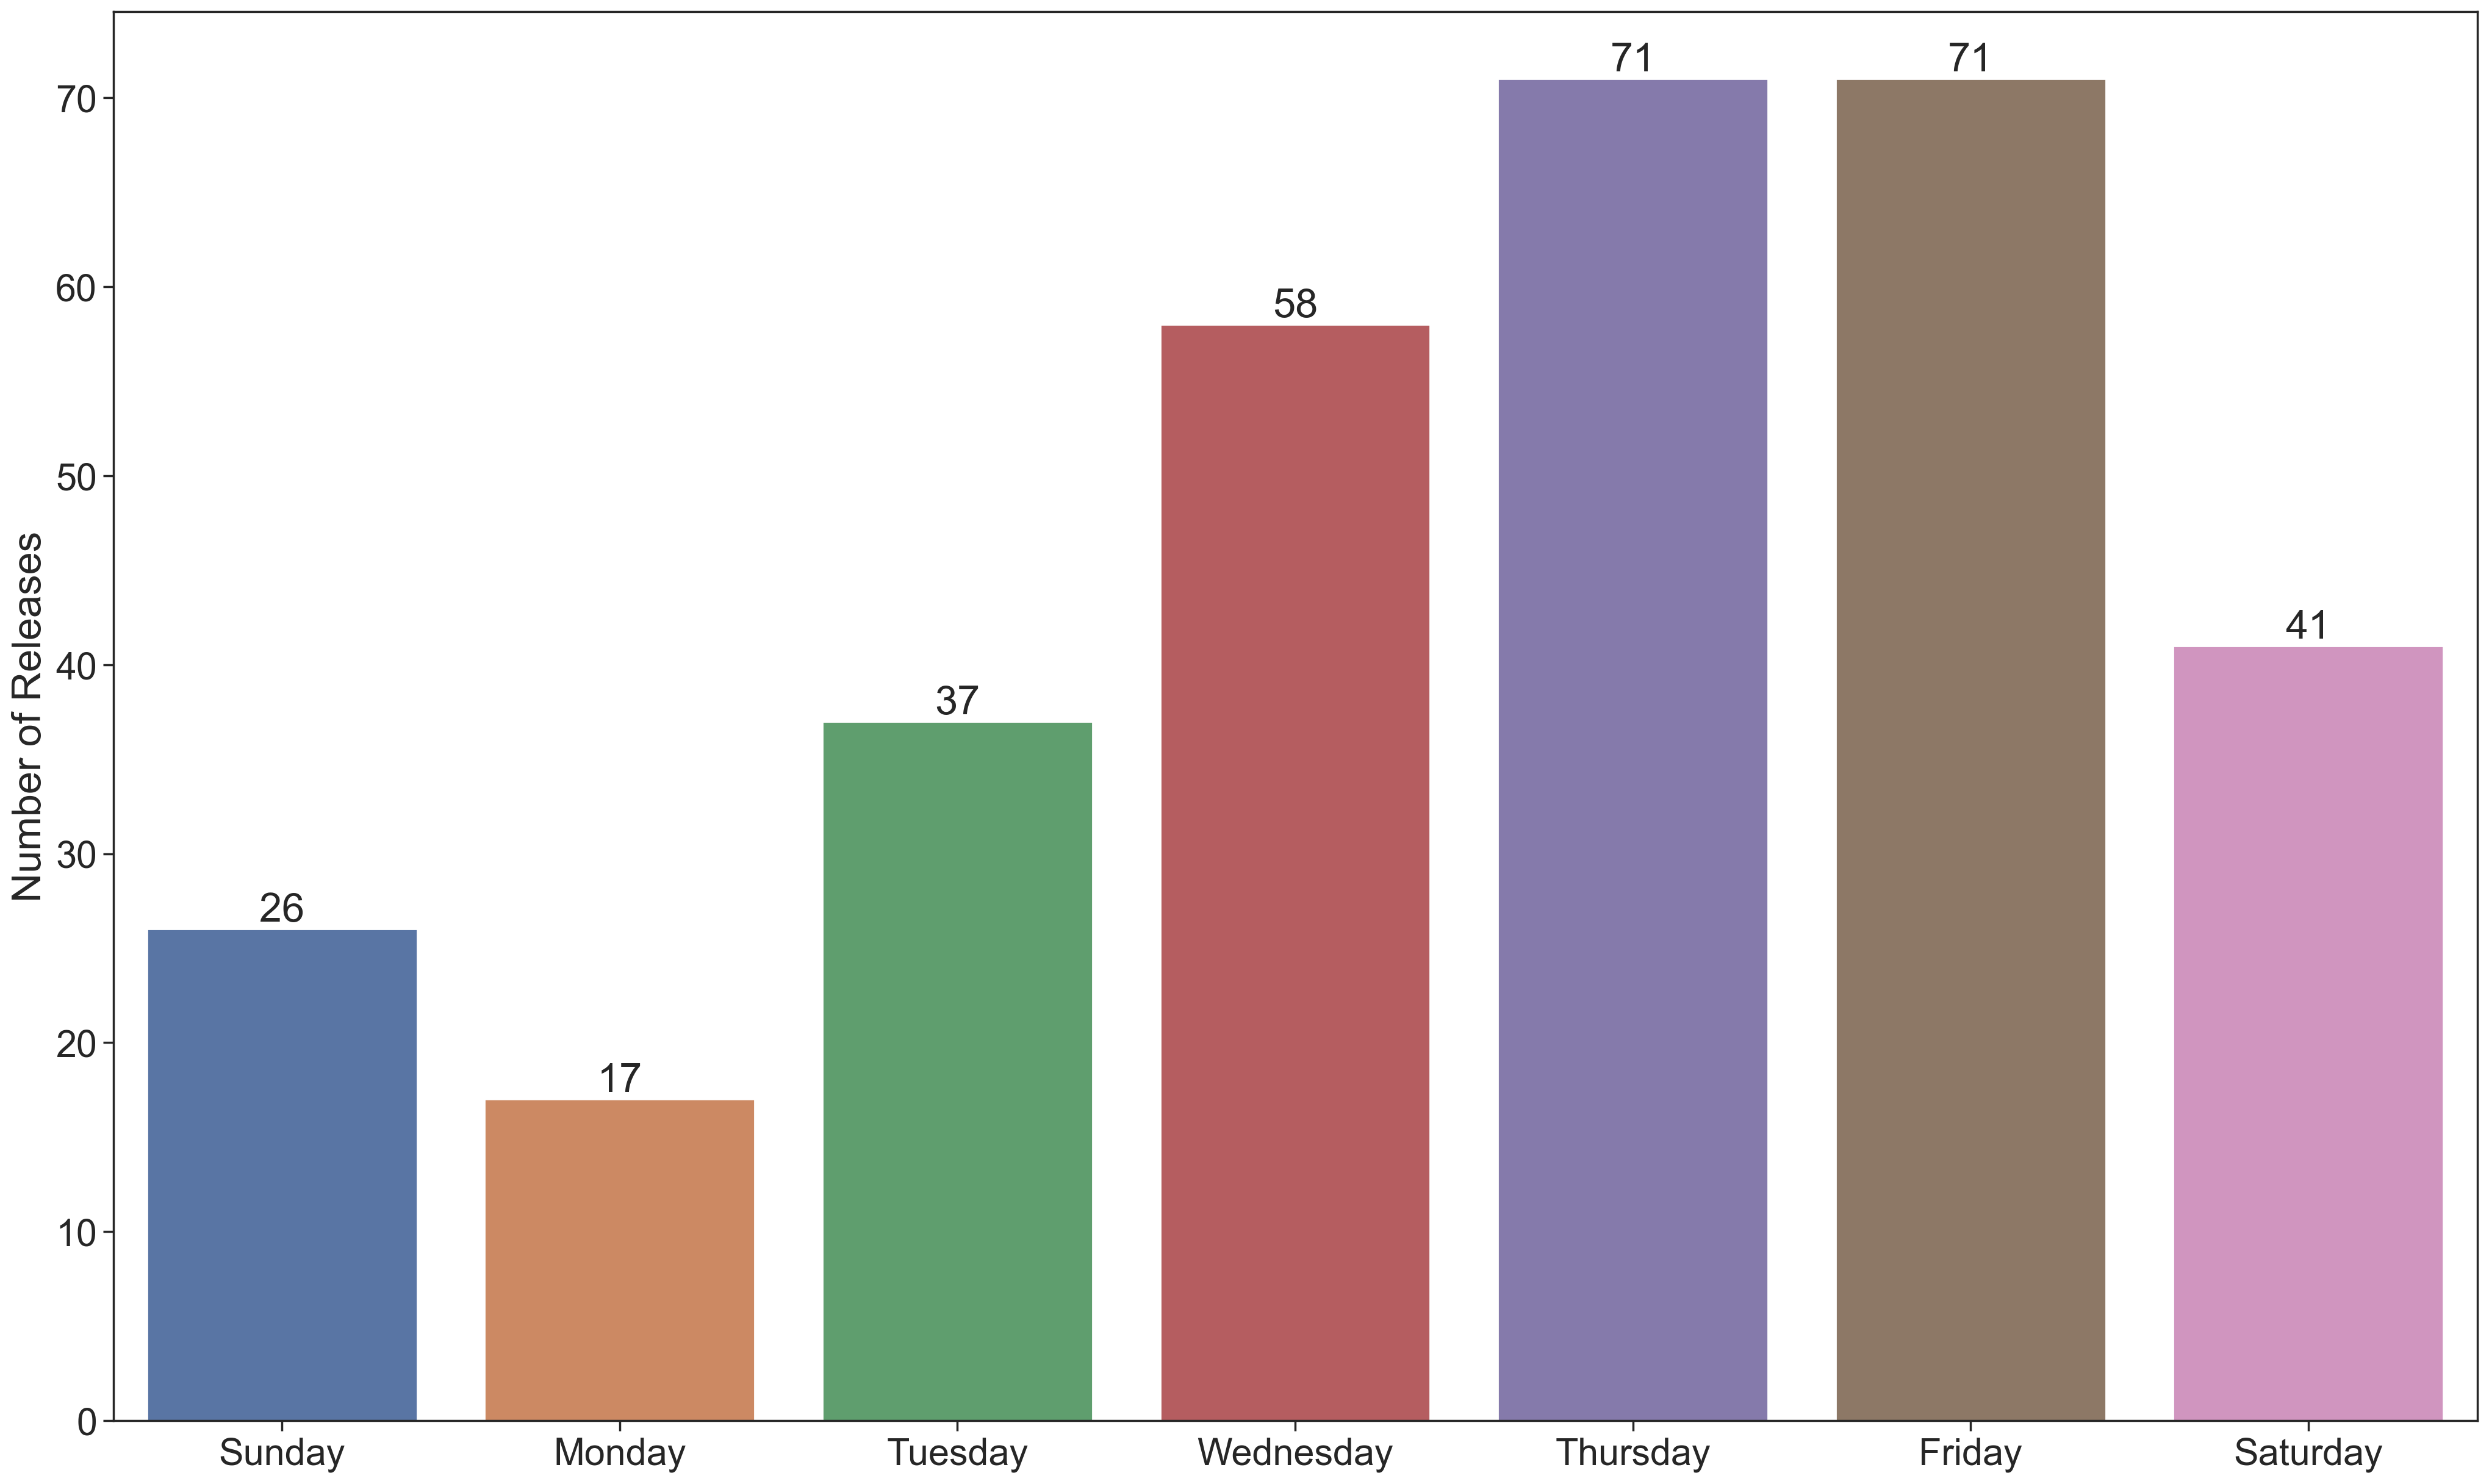

In [30]:
temp = df[df["release_post"] == True]["post_weekday"].value_counts()
order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
counts = [temp[d] for d in order]
ax = sns.barplot(x=order, y=counts)
for bars in ax.containers:
    ax.bar_label(bars, fmt='%d')
ax.set_ylabel("Number of Releases")
plt.show()

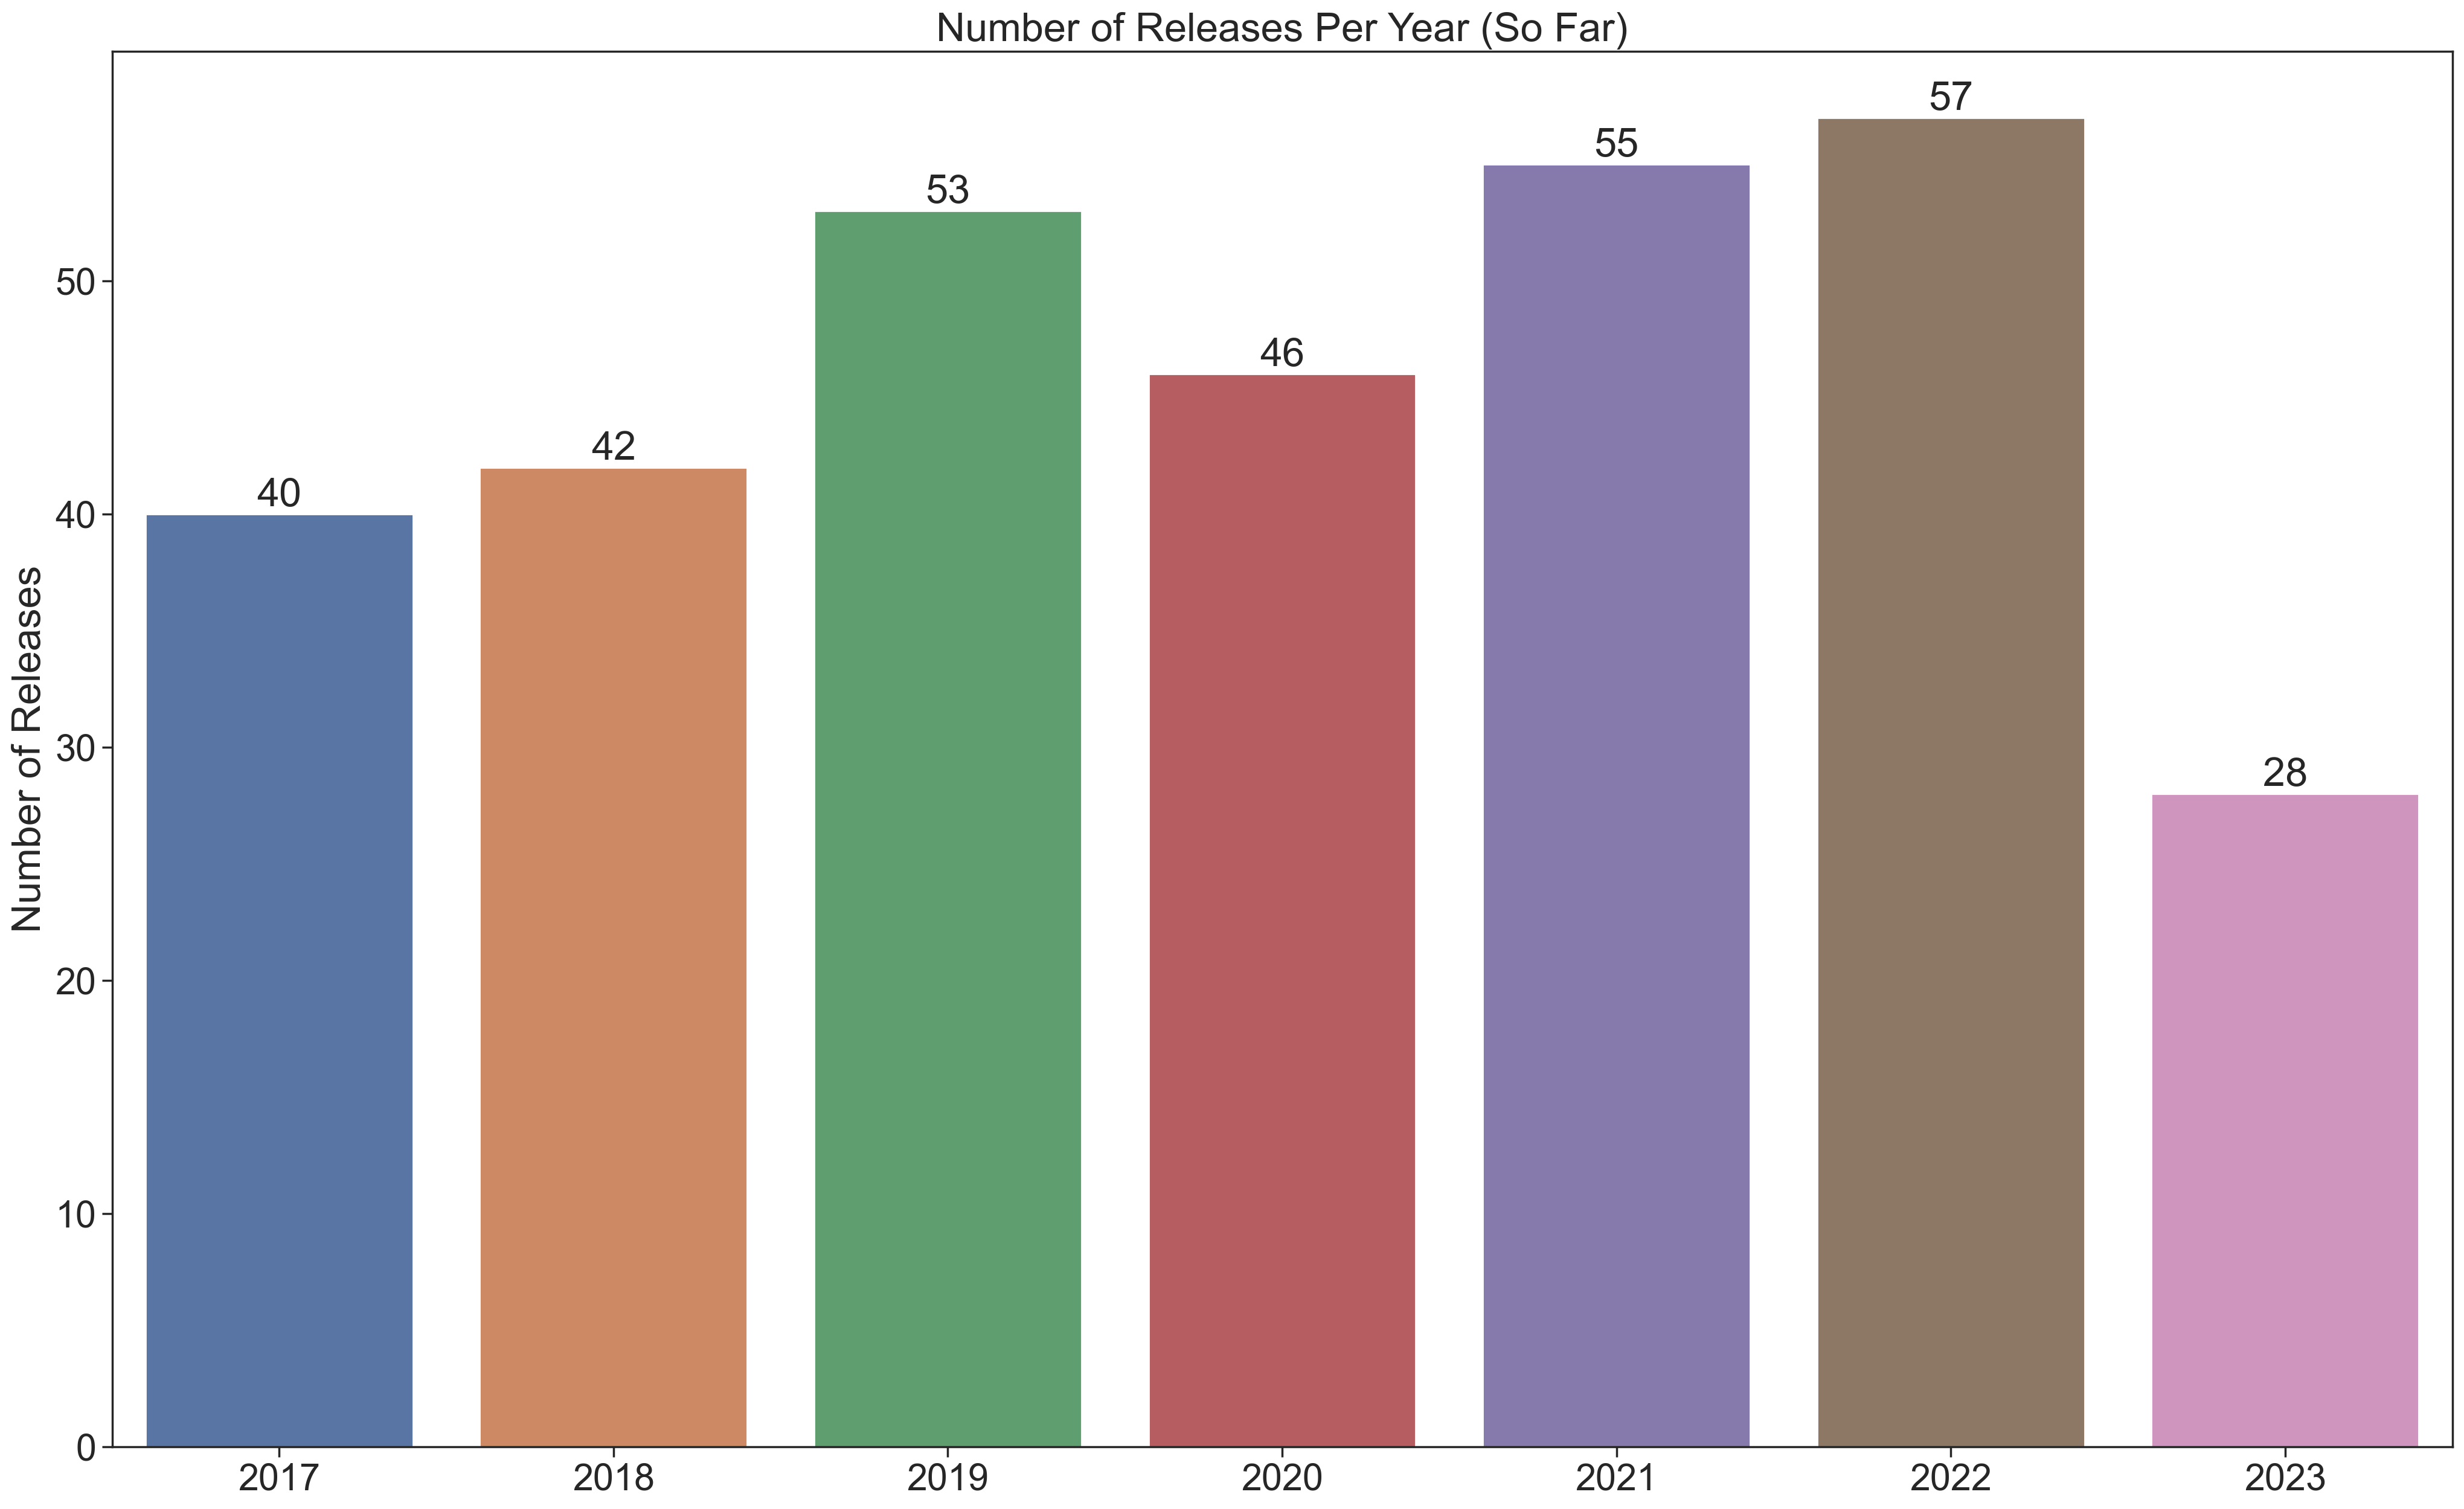

In [29]:
temp = df[df["release_post"] == True]["post_year"].value_counts().sort_index()
ax = sns.barplot(x=temp.index, y=temp.values)
for bars in ax.containers:
    ax.bar_label(bars, fmt='%d')
ax.set_xlabel(None)
ax.set_title("Number of Releases Per Year (So Far)")
ax.set_ylabel("Number of Releases")
plt.show()

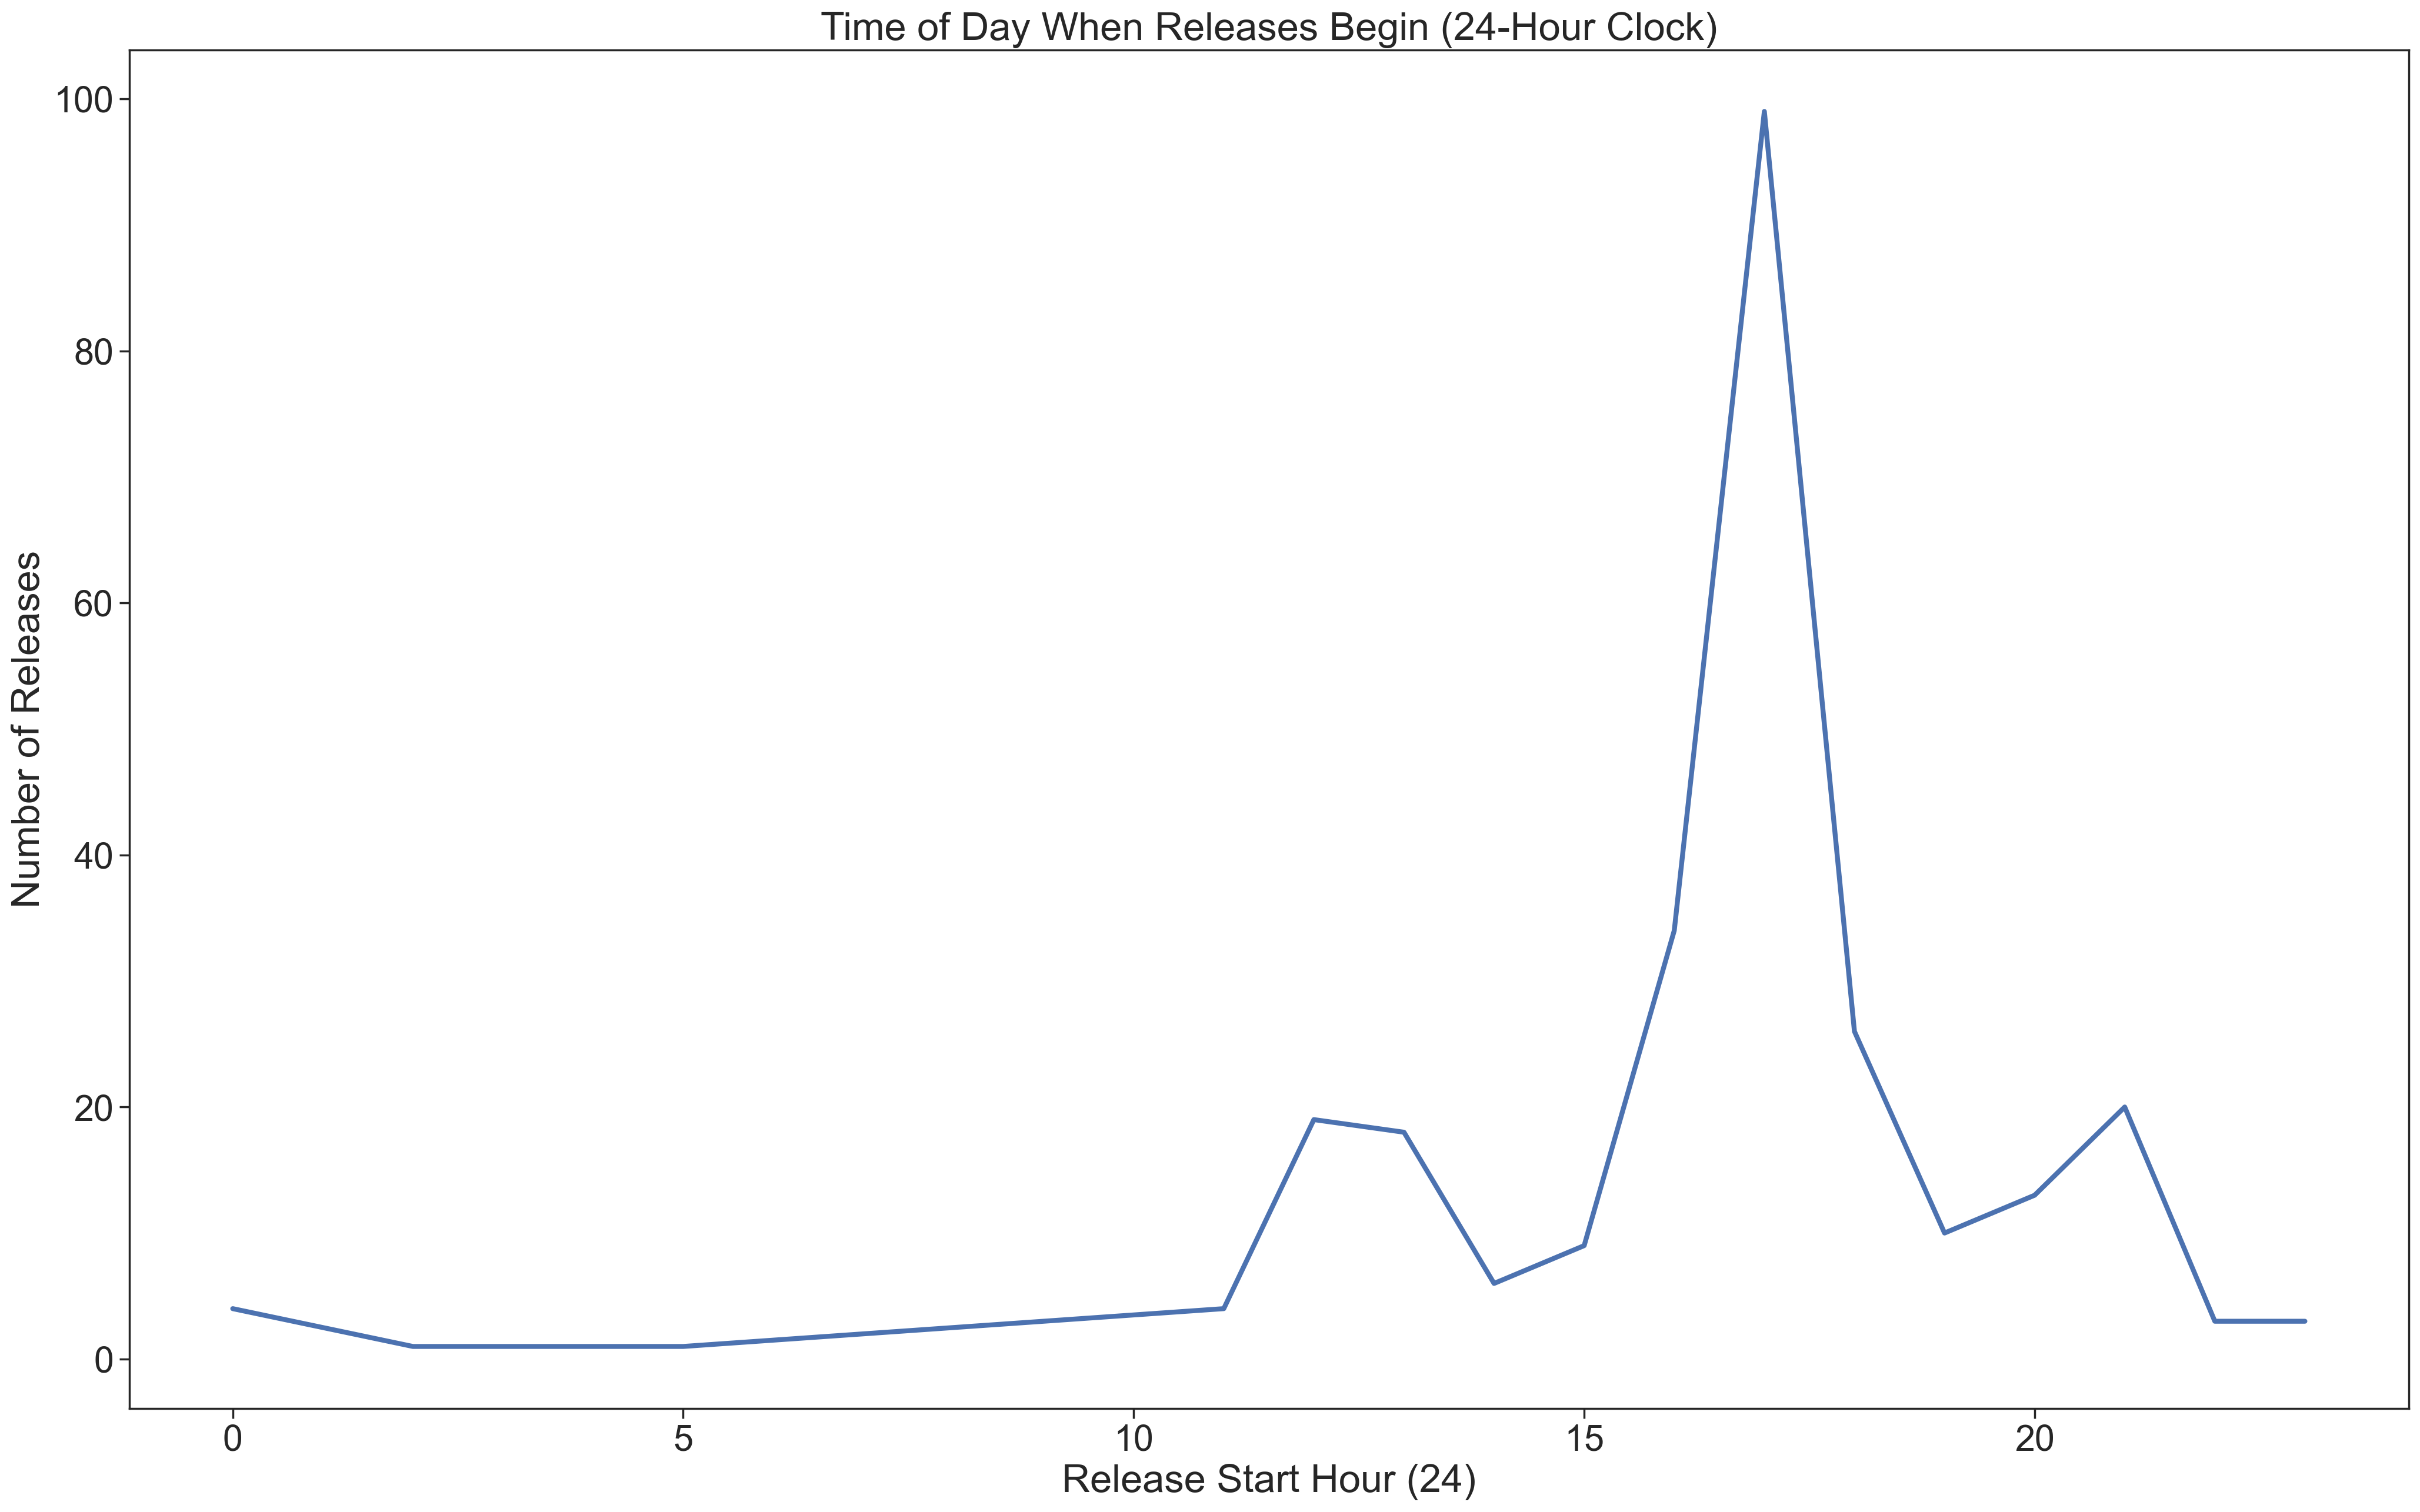

In [28]:
temp = df[df["release_post"] == True]["release_start_hour_24"].value_counts().sort_index()
ax = sns.lineplot(x=temp.index, y=temp.values, linewidth=3)
ax.set_xlabel("Release Start Hour (24)")
ax.set_title("Time of Day When Releases Begin (24-Hour Clock)")
ax.set_ylabel("Number of Releases")
plt.show()

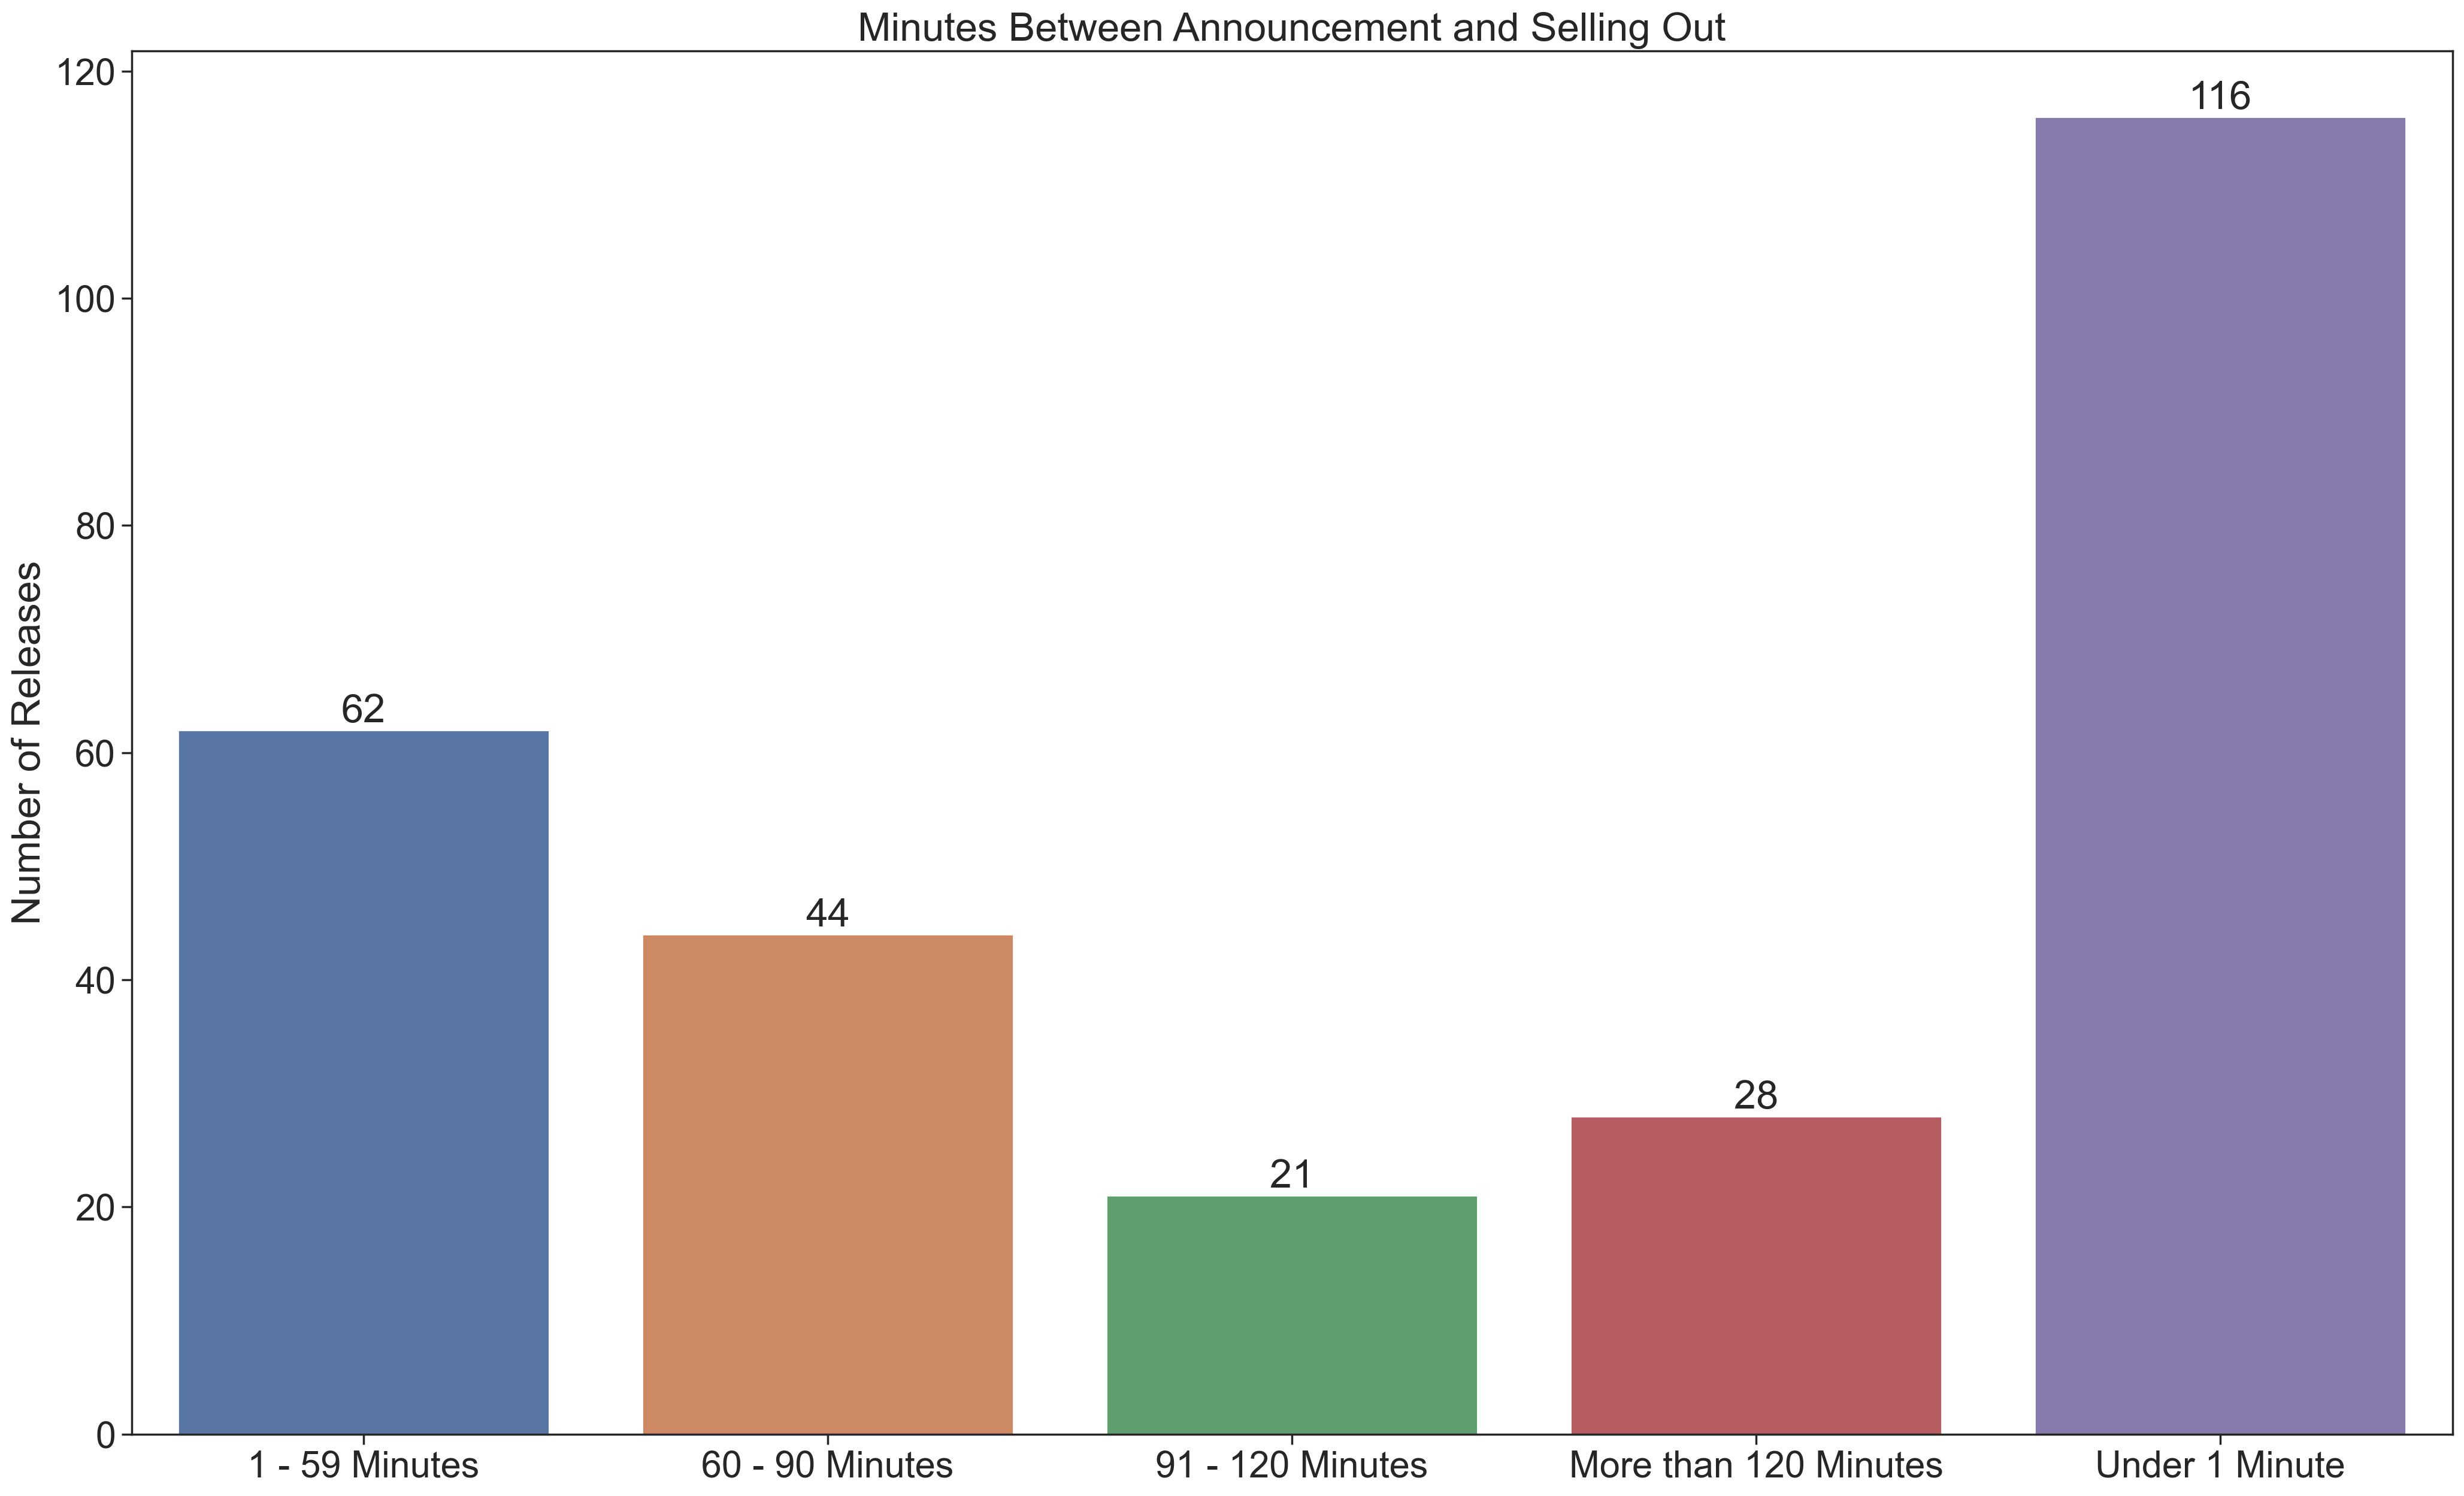

In [35]:
temp = df[df["release_post"] == True]["Release Duration Group"].value_counts().sort_index()
ax = sns.barplot(x=temp.index, y=temp.values)
for bars in ax.containers:
    ax.bar_label(bars, fmt='%d')
ax.set_xlabel(None)
ax.set_title("Minutes Between Announcement and Selling Out")
ax.set_ylabel("Number of Releases")
plt.show()

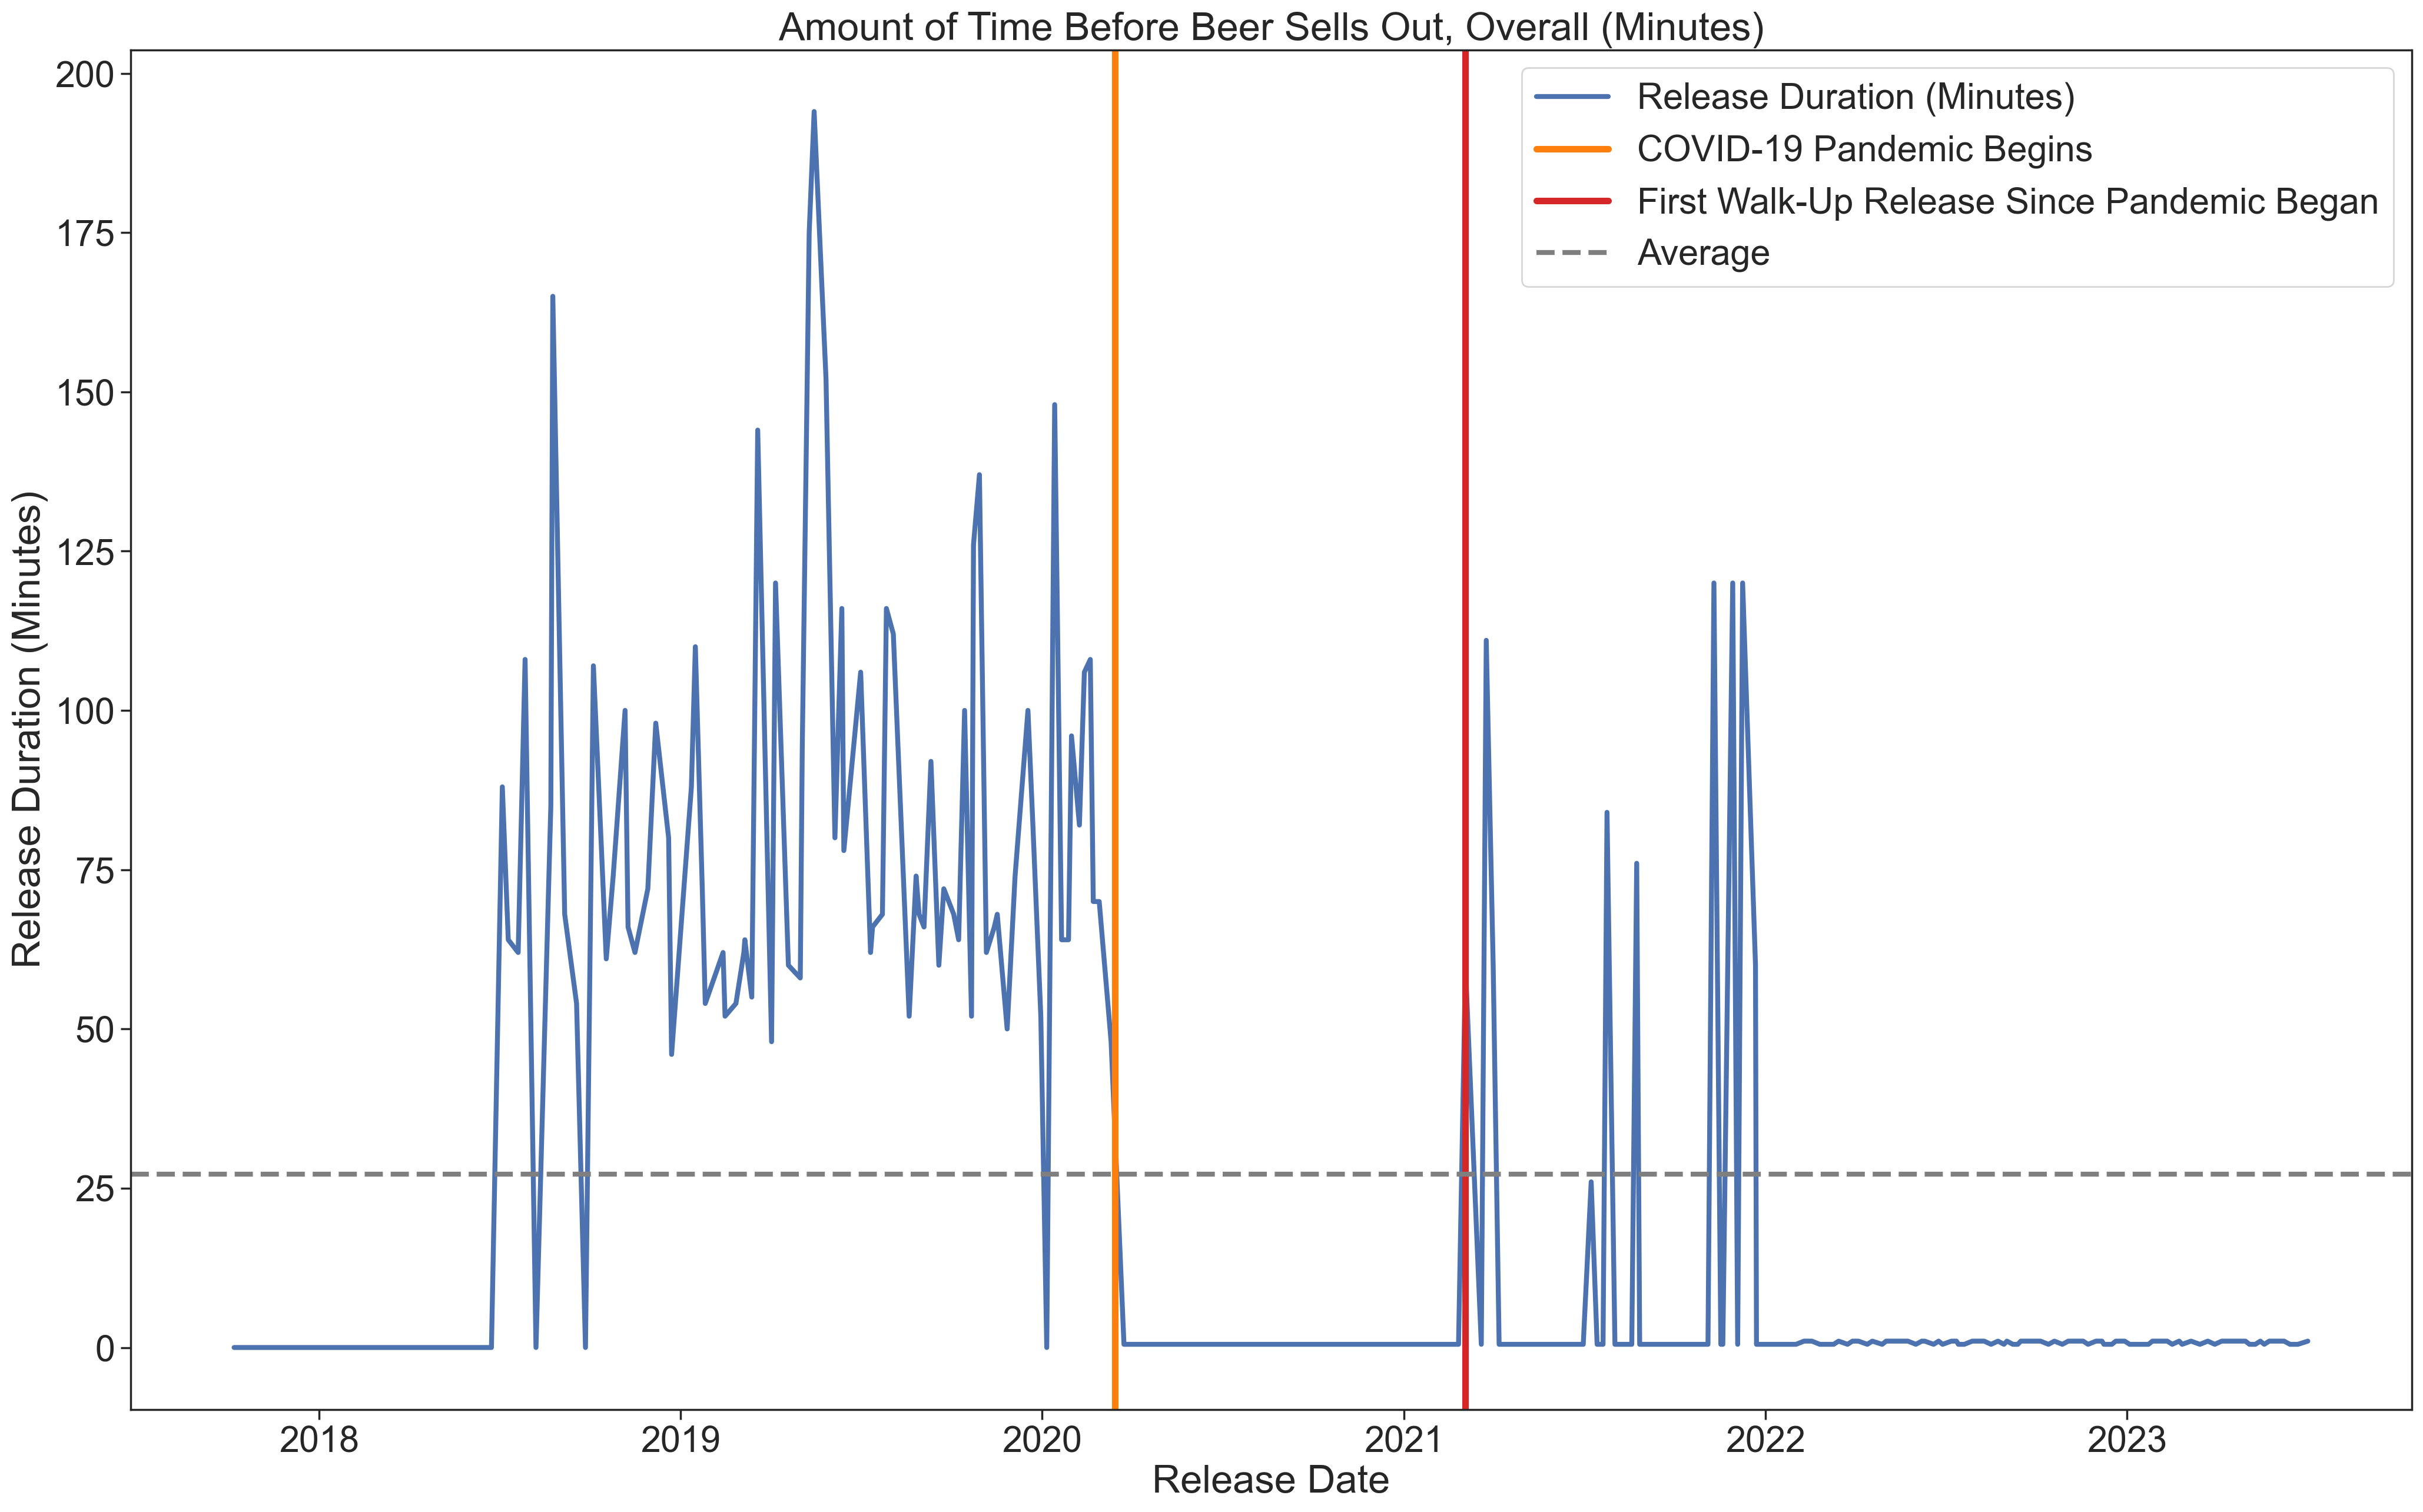

In [56]:
ax = sns.lineplot(data=df[df["release_post"] == True], x="post_date", y="release_duration_min", linewidth=3,
                  label="Release Duration (Minutes)")
ax.axvline(datetime(year=2020, month=3, day=15), label="COVID-19 Pandemic Begins", color="tab:orange",
           linewidth=4)
ax.axvline(datetime(year=2021, month=3, day=4), label="First Walk-Up Release Since Pandemic Began",
           color="tab:red", linewidth=4)
ax.axhline(df[df["release_post"] == True]["release_duration_min"].mean(), linewidth=3, color="tab:grey",
           label="Average", linestyle="--")
ax.legend()
ax.set_title("Amount of Time Before Beer Sells Out, Overall (Minutes)")
ax.set_xlabel("Release Date")
ax.set_ylabel("Release Duration (Minutes)")
plt.show()

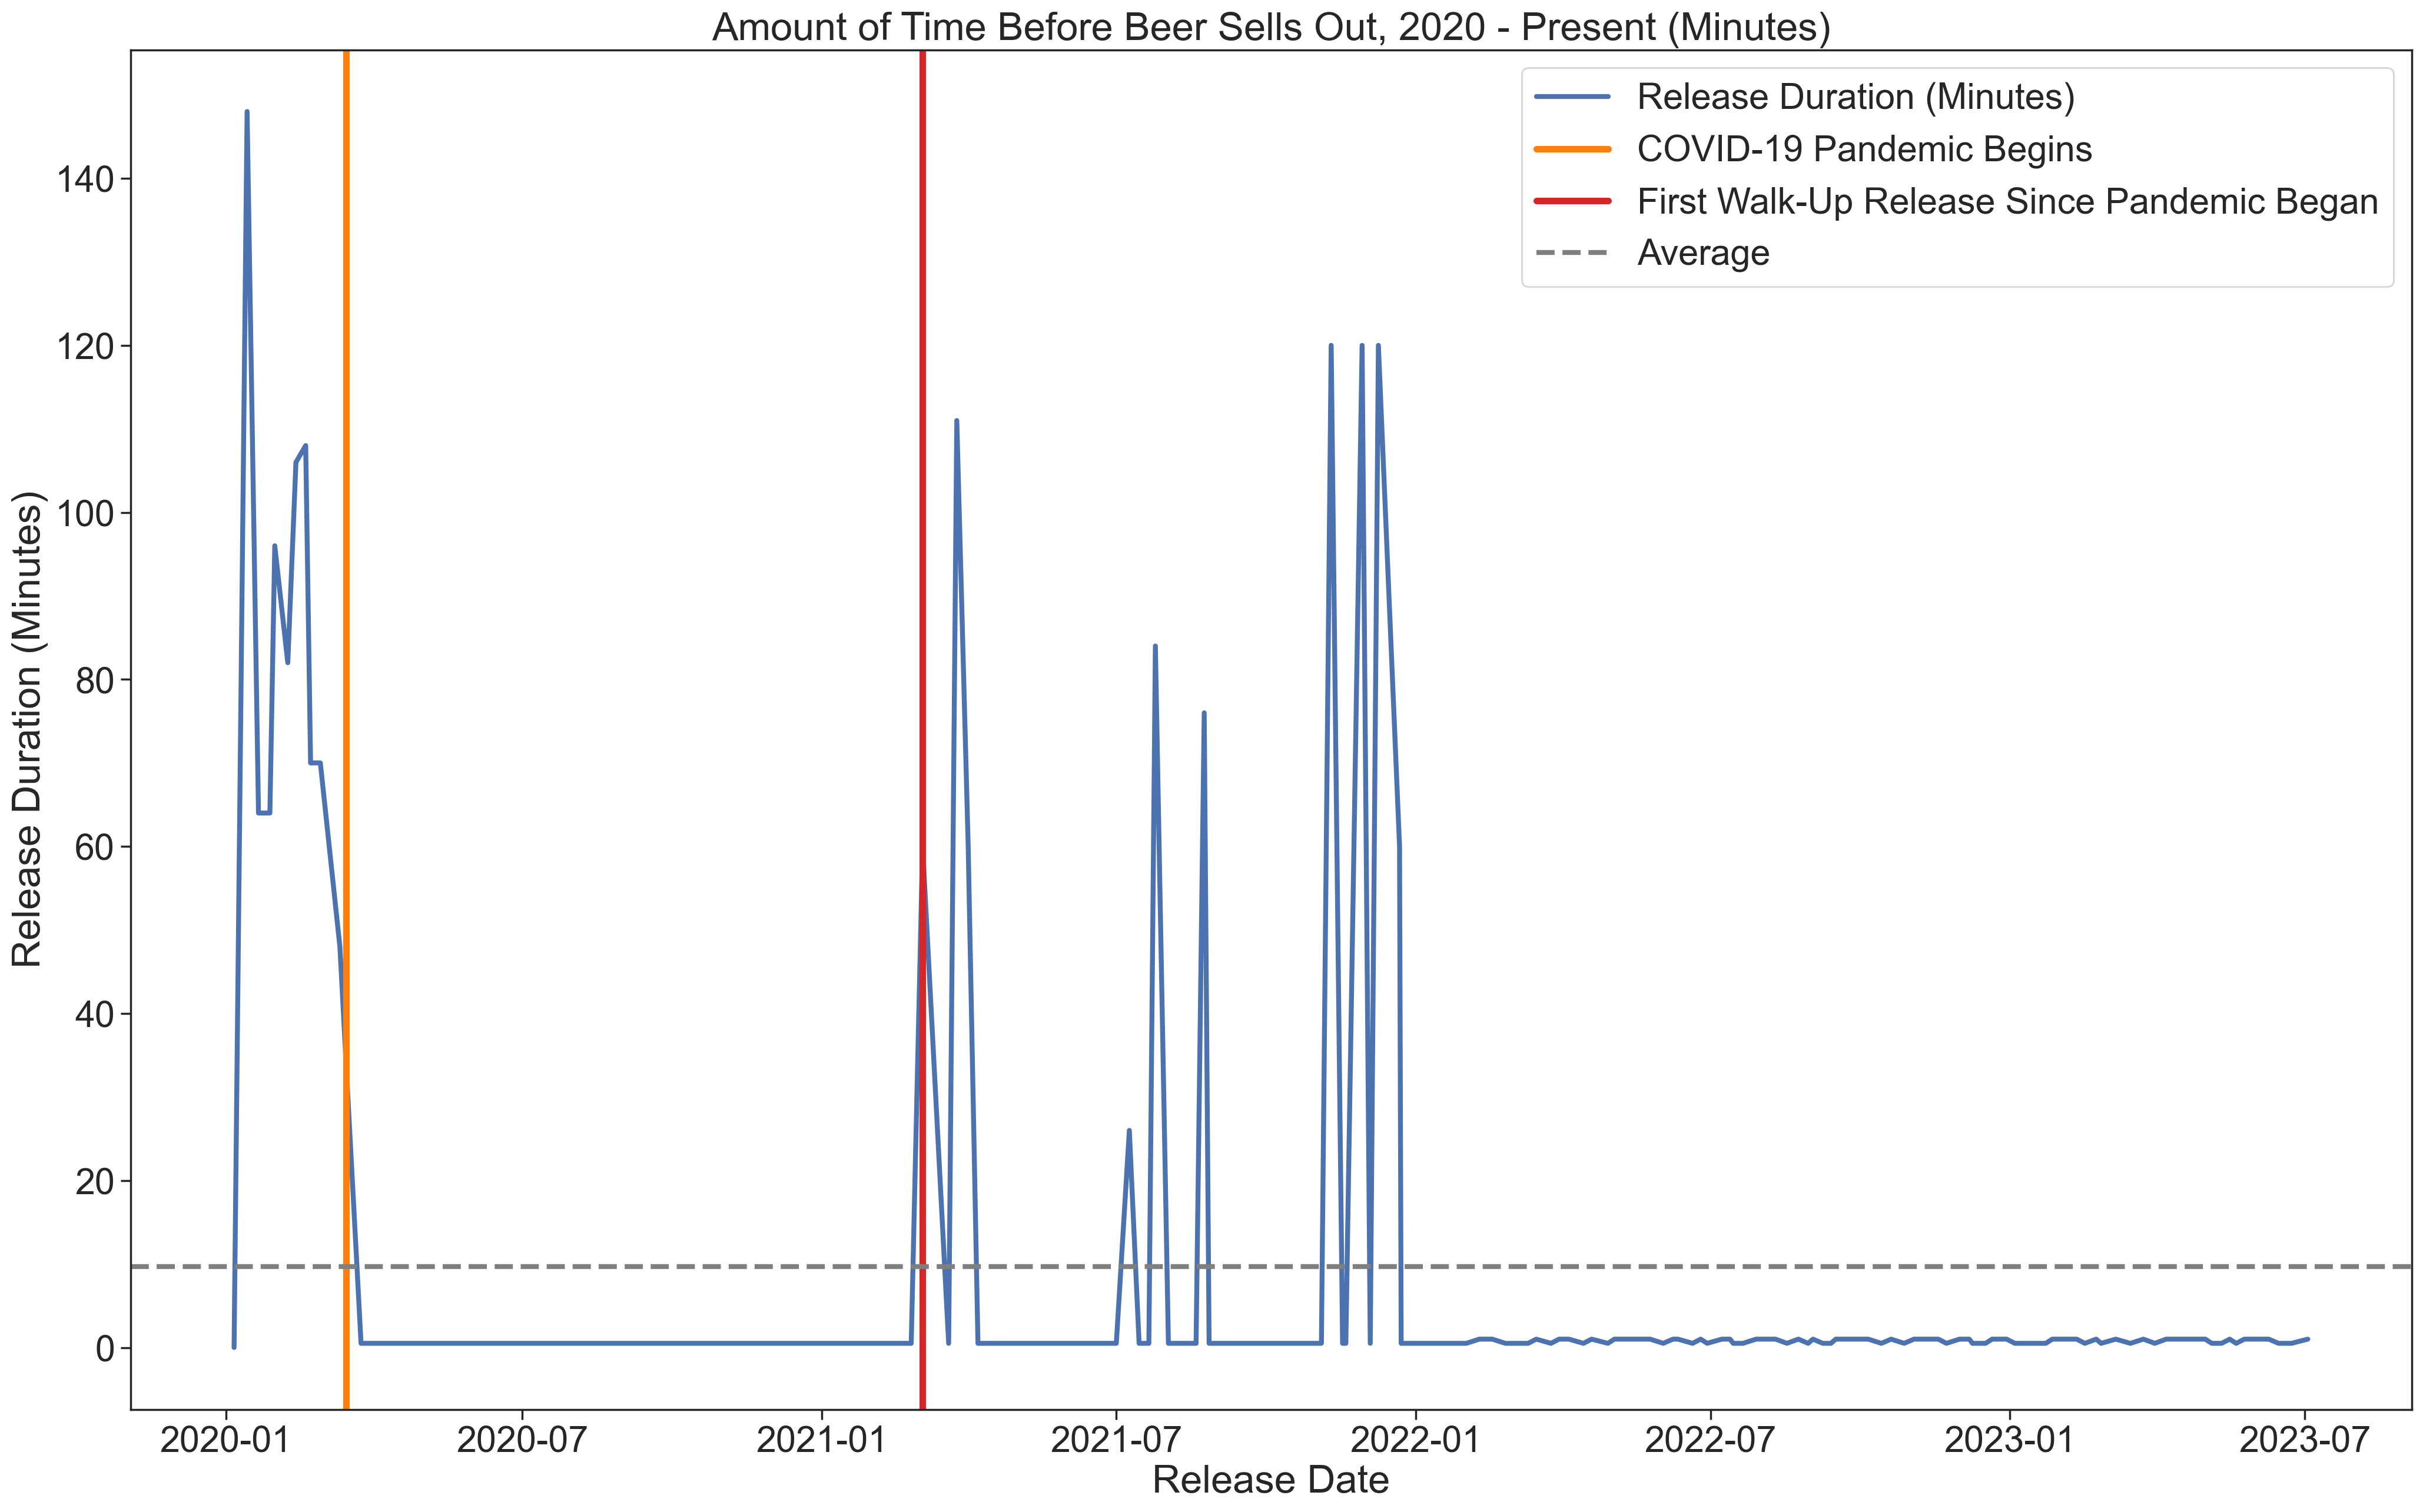

In [58]:
ax = sns.lineplot(data=df[df["release_post"] == True].query('`post_year` >= 2020'),
                  x="post_date", y="release_duration_min", linewidth=3,
                  label="Release Duration (Minutes)")
ax.axvline(datetime(year=2020, month=3, day=15), label="COVID-19 Pandemic Begins", color="tab:orange",
           linewidth=4)
ax.axvline(datetime(year=2021, month=3, day=4), label="First Walk-Up Release Since Pandemic Began",
           color="tab:red", linewidth=4)
ax.axhline(df[df["release_post"] == True].query('`post_year` >= 2020')["release_duration_min"].mean(),
           linewidth=3, color="tab:grey", label="Average", linestyle="--")
ax.legend()
ax.set_title("Amount of Time Before Beer Sells Out, 2020 - Present (Minutes)")
ax.set_xlabel("Release Date")
ax.set_ylabel("Release Duration (Minutes)")
plt.show()